# Pymaceuticals Inc.
---

### Analysis

- According the test results as shown below.
1 Mice with higher weights have on average bigger tumours. 
2 When it comes to tumour reduction, Capomulin and Ramicane seem to shrink the tumours more than the other two treatments
3 Tumours seem to affect male mice more than female mice howerver the difference is very slight and is no more than 2%. More specific details can be found in the pie chart section
 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data= pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
combined_data.head(16)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
print(combined_data['Mouse ID'].nunique())

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse = duplicate_df['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data_ID =combined_data.loc[combined_data['Mouse ID']== 'g989']
print(duplicate_mouse_data_ID)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_mouse_data_ID= combined_data.loc[combined_data['Mouse ID']!= 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
print(Clean_mouse_data_ID['Mouse ID'].nunique())

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean = Clean_mouse_data_ID.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

Median = Clean_mouse_data_ID.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

Variance = Clean_mouse_data_ID.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

Standard_deviation = Clean_mouse_data_ID.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

Standard_error = Clean_mouse_data_ID.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'] 

# Assembling the resulting series into a summary
Summary_Table = pd.DataFrame({"Mean" : Mean, "Median" : Median, "Variance" : Variance, "Standard deviation." : Standard_deviation, "Standard error." : Standard_error})

# View summary table
print(Summary_Table)


                   Mean     Median   Variance  Standard deviation.  \
Drug Regimen                                                         
Capomulin     40.675741  41.557809  24.947764             4.994774   
Ceftamin      52.591172  51.776157  39.290177             6.268188   
Infubinol     52.884795  51.820584  43.128684             6.567243   
Ketapril      55.235638  53.698743  68.553577             8.279709   
Naftisol      54.331565  52.509285  66.173479             8.134708   
Placebo       54.033581  52.288934  61.168083             7.821003   
Propriva      52.320930  50.446266  43.852013             6.622085   
Ramicane      40.216745  40.673236  23.486704             4.846308   
Stelasyn      54.233149  52.431737  59.450562             7.710419   
Zoniferol     53.236507  51.818479  48.533355             6.966589   

              Standard error.  
Drug Regimen                   
Capomulin            0.329346  
Ceftamin             0.469821  
Infubinol            0.492236  

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumour_table = Clean_mouse_data_ID.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line.
single_line_summary_stats= tumour_table.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
print(single_line_summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


C:\Users\Dalit\AppData\Local\Temp\ipykernel_20612\3744325784.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  single_line_summary_stats= tumour_table.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Timepoints for Mice Testing')

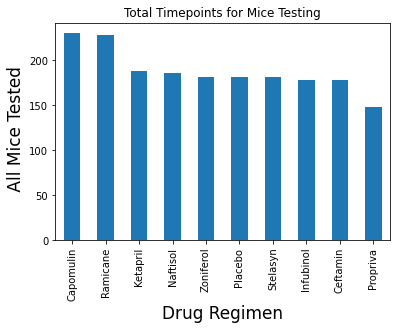

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_chart =Clean_mouse_data_ID['Drug Regimen'].value_counts()
pandas_chart.plot(kind="bar")
plt.xlabel("Drug Regimen", fontsize= 17)
plt.ylabel(" All Mice Tested", fontsize =17)
plt.title("Total Timepoints for Mice Testing")


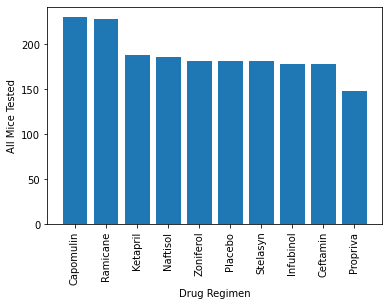

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pyplot_chart = Clean_mouse_data_ID['Drug Regimen'].value_counts()
plt.bar(pyplot_chart.index.values,pyplot_chart.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("All Mice Tested")
plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


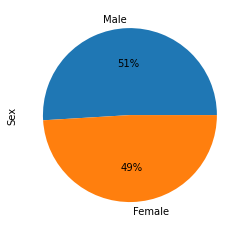

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = Clean_mouse_data_ID.Sex.value_counts()
gender_counts.plot(kind="pie",autopct='%1.f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint = Clean_mouse_data_ID.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = pd.DataFrame(max_timepoint)

last_timepoint = max_timepoint.merge(Clean_mouse_data_ID,on=['Mouse ID','Timepoint'])

#checking if it worked by printing it
last_timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [69]:
last_greatest_timepoint['Drug Regimen'].value_counts()

Infubinol    25
Placebo      25
Ceftamin     25
Zoniferol    25
Ramicane     25
Ketapril     25
Naftisol     25
Capomulin    25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

In [105]:
last_timepoint = drugs.groupby(['Drug Regimen', "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drugs_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
Medications = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#empy tumout volume list
tum_vol=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Medications:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = combined_data.loc[combined_data["Drug Regimen"]== drug, 'Tumor Volume (mm3)']
    
    
    # add subset 
    tum_vol.append(tumor_volume)
    # Create Labels for the sections of the pie
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerquartile = quartiles[0.25]
    
    upperquartile = quartiles[0.75]
    
    iqr = upperquartile-lowerquartile
    lower_bound = lowerquartile - (1.5*iqr)
    upper_bound = upperquartile + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"Outliers for {drug} : {outliers}")
    
    # Determine outliers using upper and lower bounds
    

Outliers for Capomulin : 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ramicane : 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Outliers for Infubinol : Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ceftamin : Series([], Name: Tumor Volume (mm3), dtype: float64)


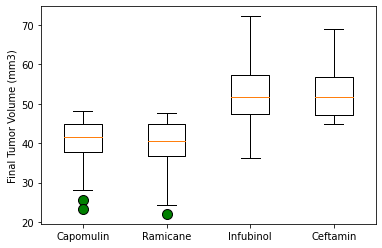

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Distribution of Tumor Volume (mm3)")
ax1.boxplot(tum_vol, flierprops = dict(markerfacecolor = "green", markersize = 10))
ax1.set_xticklabels(Medications)
plt.show()

## Line and Scatter Plots

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



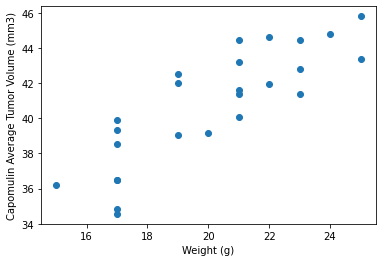

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#  Df for Capomulin regimen
capomulin = Clean_mouse_data_ID.loc[Clean_mouse_data_ID["Drug Regimen"] == "Capomulin",:]

# groupby for finding tumour volume and weight
capomulin_avetum = capomulin.groupby("Mouse ID").mean()

# x and y axis values
x_axis = capomulin_avetum["Weight (g)"]
y_axis = capomulin_avetum["Tumor Volume (mm3)"]

# allocating labels
plt.scatter(x_axis,y_axis)
plt.ylabel("Capomulin Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()


## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 

Correlation = st.pearsonr(capomulin_avetum["Weight (g)"], capomulin_avetum['Tumor Volume (mm3)'])
print(f"This is the correlation between mouse weight and the average tumor volume is {round(Correlation[0],2)}")




This is the correlation between mouse weight and the average tumor volume is 0.84
